In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 6.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=b08bfb73cf98022dbe539f1212076e7496c288a2201c066a259ed24120de0ed0
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D, axes3d

線形分離不可能なデータセット

Text(0, 0.5, 'feature 1')

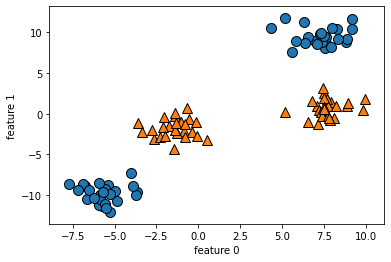

In [3]:
X, y = make_blobs(centers = 4, random_state = 8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0, 0.5, 'feature 1')

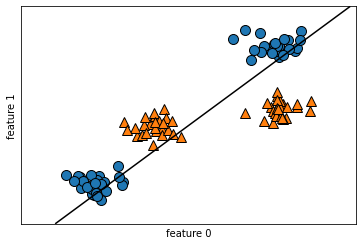

In [4]:
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0.5, 0, 'feature 2')

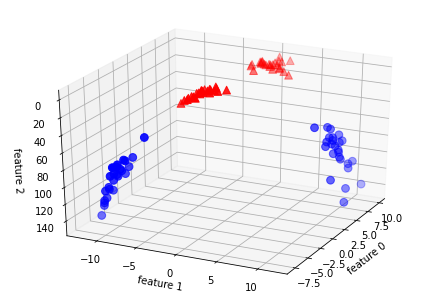

In [5]:
X_new = np.hstack([X, X[:, 1:] ** 2])
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 2")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0.5, 0, 'feature 2')

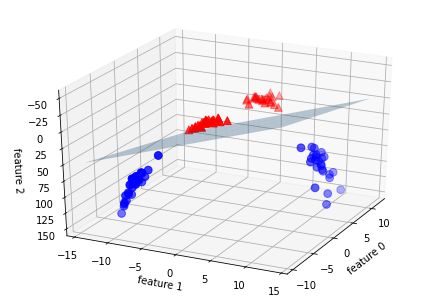

In [6]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:,1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha = 0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 2")

Text(0, 0.5, 'feature 1')

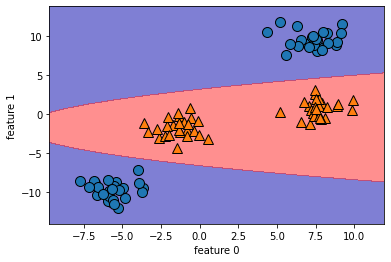

In [7]:
ZZ = YY ** 2
dec= linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY ,dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [9]:
cancer = load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [10]:
X = cancer.data
y = cancer.target
cancer_df = pd.DataFrame(data=X,columns=cancer.feature_names)
cancer_df["target"] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


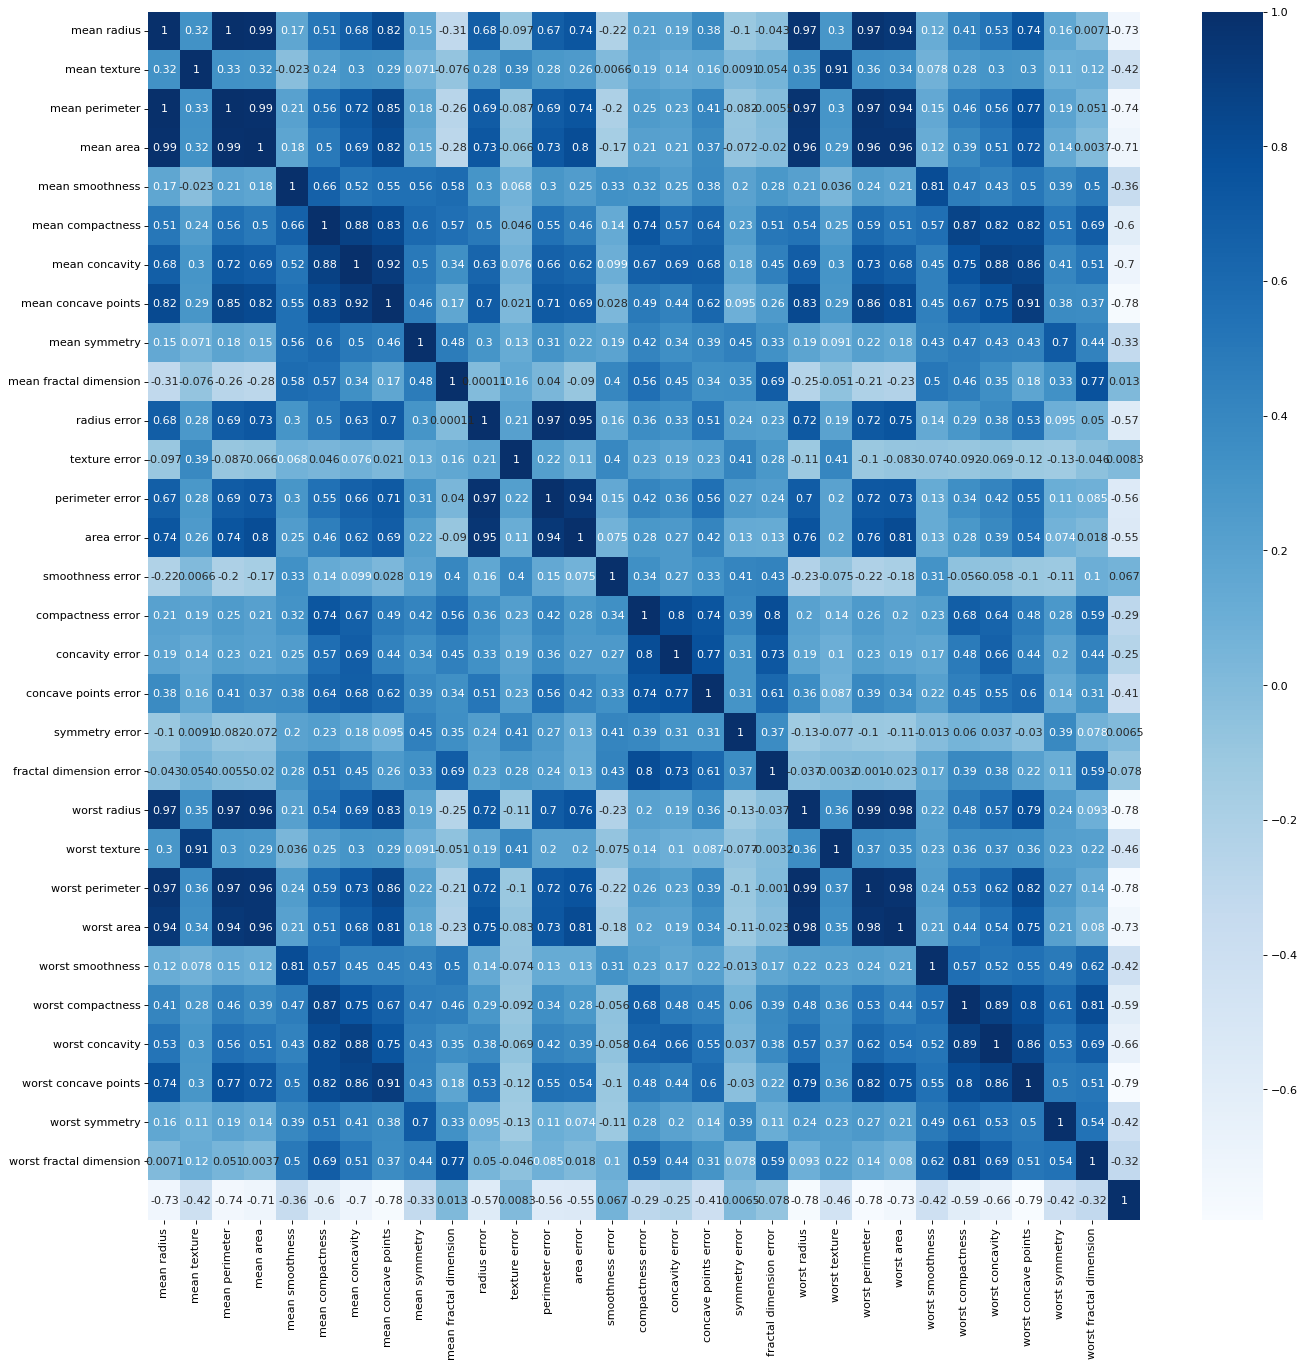

In [11]:
plt.figure(figsize=(20, 20), dpi=80)
sns.heatmap(cancer_df.corr(), annot=True,
                xticklabels=cancer.feature_names,
                yticklabels=cancer.feature_names,
                cmap="Blues",)
plt.show()

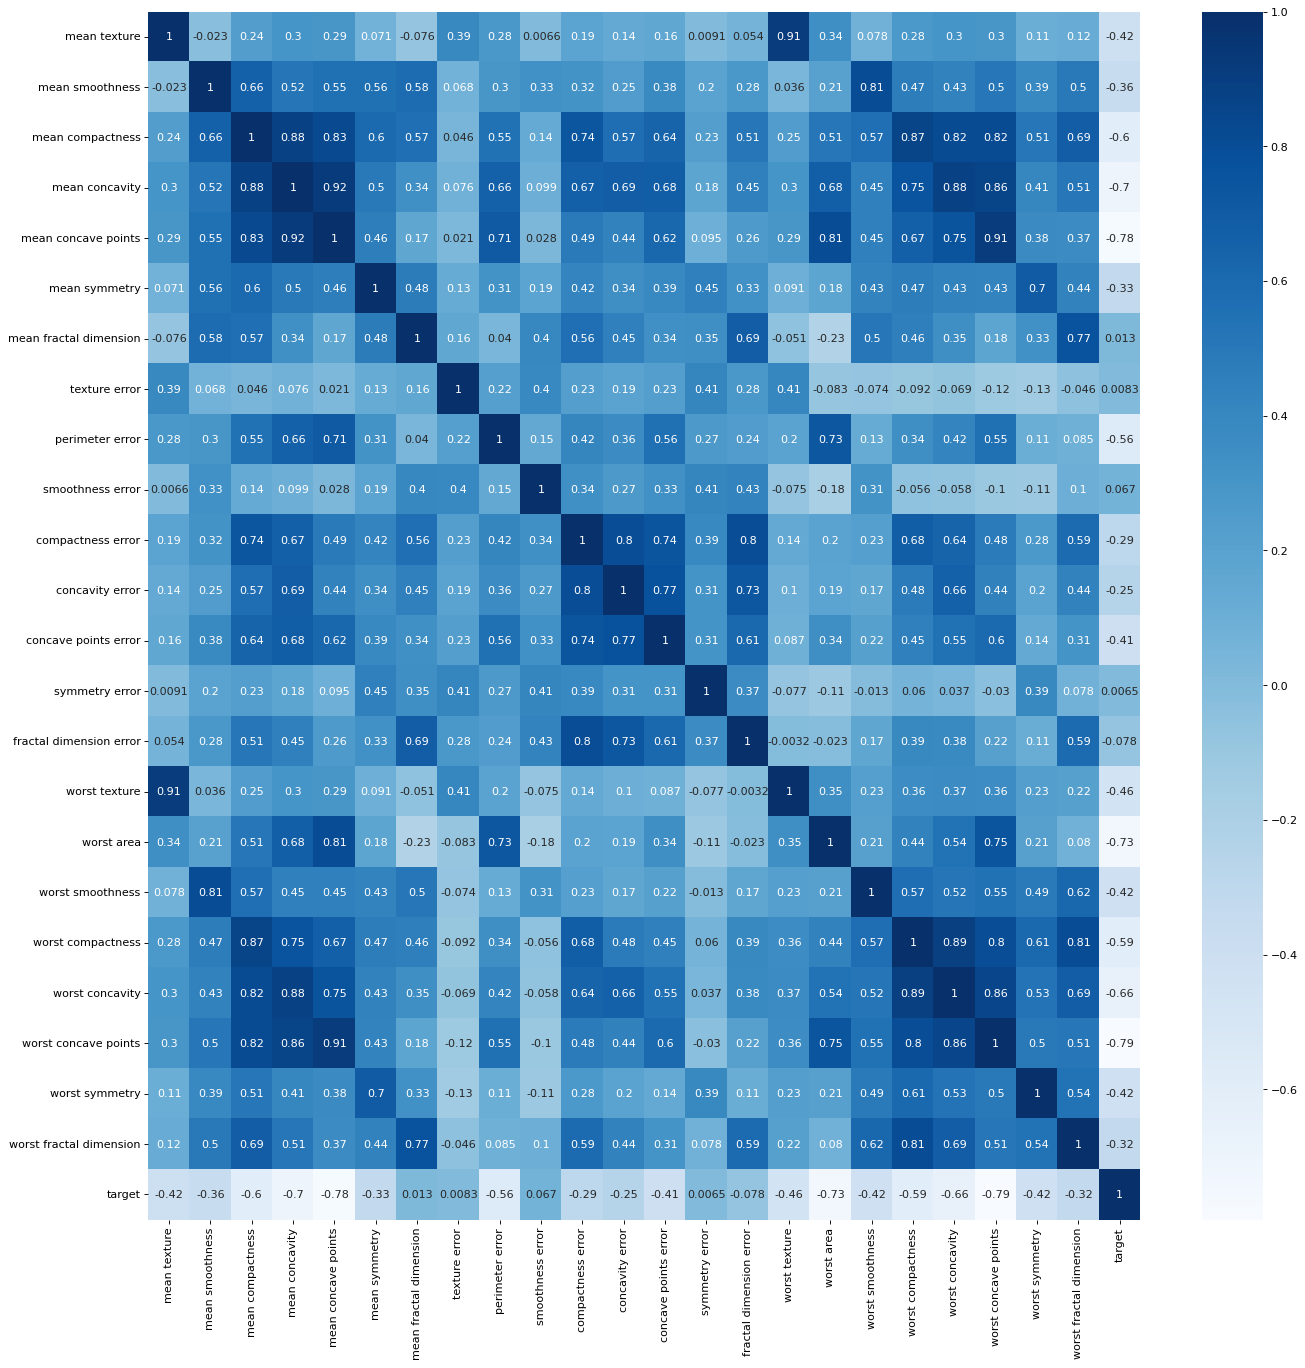

In [12]:
#お気持ち程度の前処理、後期にやる主成分分析などをするともう少しきちんと前処理できるかも？
cancer_df_feature_selected = cancer_df.drop(["mean radius", "mean perimeter", "mean area", "radius error", "area error", "worst radius", "worst perimeter"], axis=1)
plt.figure(figsize=(20, 20), dpi=80)
sns.heatmap(cancer_df_feature_selected.corr(), annot=True,
                xticklabels=cancer_df_feature_selected.columns,
                yticklabels=cancer_df_feature_selected.columns,
                cmap="Blues",)
plt.show()

In [25]:
X = cancer_df_feature_selected.drop("target", axis=1)
y = cancer_df_feature_selected['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)
cancer_svc = SVC(kernel="rbf",C=1, gamma="scale",max_iter=100000)
cancer_svc.fit(X_train, Y_train)
print(f"訓練データ精度：{cancer_svc.score(X_train, Y_train)}")
print(f"テストデータ精度：{cancer_svc.score(X_test, Y_test)}")

訓練データ精度：0.9084507042253521
テストデータ精度：0.9300699300699301


In [38]:
#標準化
%time
X = cancer_df_feature_selected.drop("target", axis=1)
y = cancer_df_feature_selected['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, random_state=0)
cancer_svc = SVC(kernel="rbf", C=10, max_iter=100000)
cancer_svc.fit(X_train, Y_train)
print(f"訓練データ精度：{cancer_svc.score(X_train, Y_train)}")
print(f"テストデータ精度：{cancer_svc.score(X_test, Y_test)}")

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs
訓練データ精度：0.9882629107981221
テストデータ精度：0.972027972027972


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: linewidths is ignored by contourf
  app.launch_new_instance()


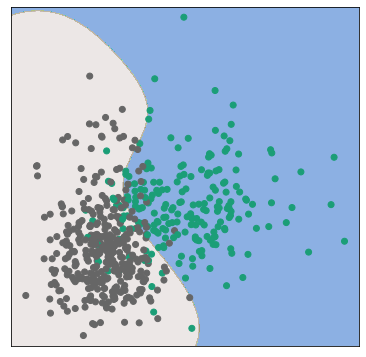

In [15]:
X = cancer.data[:,:2]
Y = cancer.target
cancer_svc1 = SVC(kernel="rbf",C=1,max_iter=1000).fit(X, Y)
h = 0.02
x_min=X[:, 0].min() - 1
x_max =X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)    
Z = cancer_svc1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)    
plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)    
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

In [16]:
from sklearn.datasets import load_digits

In [17]:
digits = load_digits()
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

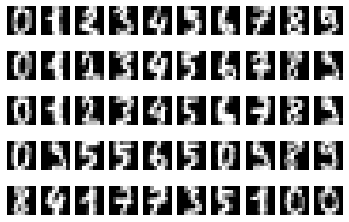

In [18]:
i = 0
while i < 50:
  plt.subplot(5, 10, i + 1)
  plt.axis("off")
  plt.imshow(digits.images[i], cmap="gray")
  i += 1

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0
1,0.0,0.0,11.0,16.0,8.0,14.0,6.0,0.0
2,0.0,2.0,16.0,10.0,0.0,9.0,9.0,0.0
3,0.0,1.0,16.0,4.0,0.0,8.0,8.0,0.0
4,0.0,4.0,16.0,4.0,0.0,8.0,8.0,0.0
5,0.0,1.0,16.0,5.0,1.0,11.0,3.0,0.0
6,0.0,0.0,12.0,12.0,10.0,10.0,0.0,0.0
7,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0


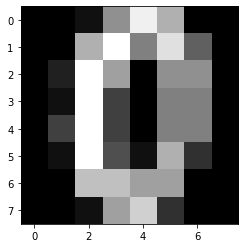

In [19]:
plt.imshow(digits.images[10], cmap="gray")
number_data = pd.DataFrame(digits.images[10])
number_data

In [70]:
X = digits.data
Y = digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [92]:
digits_classifier = SVC(kernel="poly", C=0.1, max_iter=10000)
digits_classifier.fit(X_train, Y_train)

SVC(C=0.1, kernel='poly', max_iter=10000)

In [93]:
print(f"train accuracy: {digits_classifier.score(X_train, Y_train)}")
print(f"test accuracy: {digits_classifier.score(X_test, Y_test)}")

train accuracy: 0.9866369710467706
test accuracy: 0.9733333333333334


In [94]:
import cv2
import joblib
joblib.dump(digits_classifier, "mr_super_digits")

['mr_super_digits']

In [95]:
 def predict_digits(filename):
   digits_classifier = joblib.load("mr_super_digits")
   img = cv2.imread(filename)
   img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   img = cv2.resize(img, (8, 8))
   img = 15 - img
   img = img.reshape(-1, 64)
   result = digits_classifier.predict(img)
   return (result[0])

In [98]:
#predict_digits("super5.png")
#img = cv2.imread("super4.png")
res = predict_digits("/super0.png")
print(res)

0
